In [36]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
from sklearn import linear_model
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [37]:
#import Data
df = pd.read_csv('kc_house_data.csv')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [38]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [39]:
df[df['bedrooms']>10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


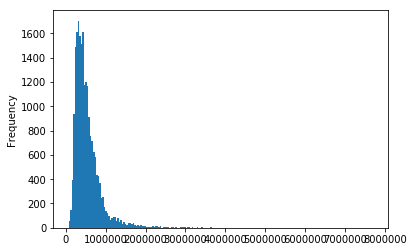

In [40]:
df.price.plot(kind='hist', bins=200);

In [41]:
df[df['price']>4000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


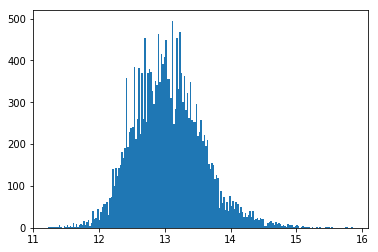

In [42]:
plt.hist((np.log(df.price)), bins=200);

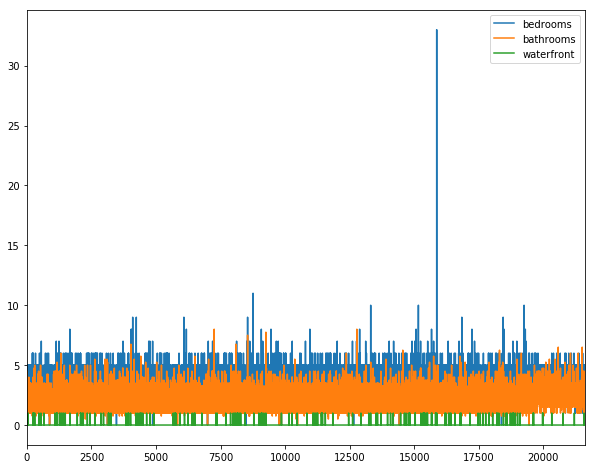

In [43]:
plt.figure(figsize=(10,8))
df.bedrooms.plot(), df.bathrooms.plot(), df.waterfront.plot()
plt.legend();

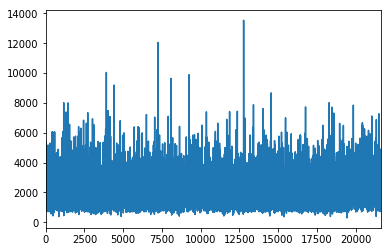

In [44]:
df.sqft_living.plot()

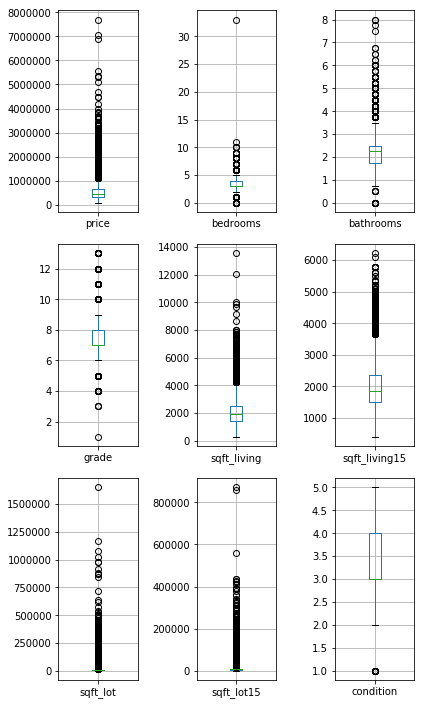

In [45]:
fig = plt.figure(figsize=(6,10))
ax1 = plt.subplot(331)
ax2 = plt.subplot(332)
ax3 = plt.subplot(333)
ax4 = plt.subplot(334)
ax5 = plt.subplot(335)
ax6 = plt.subplot(336)
ax7 = plt.subplot(337)
ax8 = plt.subplot(338)
ax9 = plt.subplot(339)
df.boxplot(column='price', ax=ax1)
df.boxplot(column='bedrooms', ax=ax2)
df.boxplot(column='bathrooms', ax=ax3)
df.boxplot(column='grade', ax=ax4)
df.boxplot(column='sqft_living', ax=ax5)
df.boxplot(column='sqft_living15', ax=ax6)
df.boxplot(column='sqft_lot', ax=ax7)
df.boxplot(column='sqft_lot15', ax=ax8)
df.boxplot(column='condition', ax=ax9)
plt.suptitle('')
plt.tight_layout()

In [46]:
df[df['bedrooms']>10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [47]:
df.quantile(.97).astype('int')

id               9477100432
price               1388000
bedrooms                  5
bathrooms                 3
sqft_living            4140
sqft_lot              67436
floors                    2
waterfront                0
view                      3
condition                 5
grade                    10
sqft_above             3700
sqft_basement          1340
yr_built               2013
yr_renovated           1989
zipcode               98188
lat                      47
long                   -121
sqft_living15          3560
sqft_lot15            51400
Name: 0.97, dtype: int64

In [48]:
outliers = df.quantile(.97)
x = df[(df['price']<outliers['price'])]
x = x[(df['bedrooms']<outliers['bedrooms'])]
x = x[(df['sqft_living']<outliers['sqft_living'])]
x.shape

(19034, 21)

In [49]:
x_zipcode = pd.get_dummies(x['zipcode'],drop_first=True)
x = pd.concat([x,x_zipcode], axis=1)

In [50]:
x['built_ago'] = 2017 - x['yr_built']
x['have_basement'] = np.where(x['sqft_basement']>0, 1, 0)
x['renovated'] = np.where(x['yr_renovated']>0, 1, 0)
x['weighted_bath'] = x['bathrooms'] **2
x['weighted_livingspace'] = x['sqft_living'] **2
x['diff_living'] = x['sqft_living'] - x['sqft_living15']
x['bed_bath_ratio'] = (x['bedrooms']+1)/( x['bathrooms']+1)

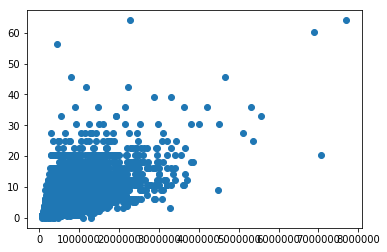

In [51]:
plt.scatter(df.price, (df.bathrooms)**2)

In [52]:
y= x.price
x = x.drop(['id','date','zipcode','lat','long','price','yr_renovated','yr_built','sqft_basement','bathrooms','grade'], axis=1)
x.shape

(19034, 86)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8,random_state=0)

In [54]:
#Regression Modeling
reg = linear_model.LinearRegression()
regmodel = reg.fit(x_train, y_train)
y_predtest = regmodel.predict(x_test)

In [55]:
#Root Mean Square
RMS = mean_squared_error(y_test, y_predtest)**0.5
RMS

99613.618000536648

In [56]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(x_train, y_train)
y_ls_predtest = ls.predict(x_test)
ls_rmse = mean_squared_error(y_test, y_ls_predtest)**0.5
ls_rmse

99609.437309707224

In [57]:
r2_score(y_test, y_ls_predtest)

0.80621349280704602

In [58]:
# Ridge regression
from sklearn.linear_model import Ridge
rg = Ridge()
rg.fit(x_train, y_train)
y_rg_predtest = rg.predict(x_test)
ls_rmse = mean_squared_error(y_test, y_rg_predtest)**0.5
ls_rmse

99710.264813454167

In [59]:
r2_score(y_test, y_rg_predtest)

0.8058209818306038